# Predykcja rotacji pracowników


Projekt został wykonany przy użyciu zbioru danych dotyczącego HR Analytics, koncentrującego się na problemie rotacji pracowników (Employee Attrition). Decyzja o wyborze tych konkretnych plików (`df1`, `df2`, `attrition`) wynika z następujących powodów:

Głównym celem analizy jest przewidzenie, czy pracownik odejdzie z firmy (zmienna `Attrition`). Jest to klasyczny problem biznesowy, gdzie trafna predykcja pozwala firmie zaoszczędzić koszty związane z rekrutacją i szkoleniem nowych osób.

Pojedyncze pliki nie dają pełnego obrazu sytuacji, dlatego zdecydowałam się na ich połączenie:
* **`df1`:** Zawiera kluczowe cechy demograficzne (wiek, wykształcenie, stan cywilny) oraz specyfikę stanowiska (dział, rola). Pozwala odpowiedzieć na pytanie: *"Kto odchodzi?"*.
* **`df2`:** Dostarcza informacji o historii pracy, wynagrodzeniu, podwyżkach i satysfakcji. Pozwala odpowiedzieć na pytanie: *"Dlaczego odchodzi?"* (np. brak awansu).
* **`attrition`:** Zawiera etykiety (`Yes`/`No`), które odpowiadają na pytanie *"Czy pracownik odszedł z firmy?"*

Zbiór zawiera mieszankę zmiennych:
* **Numerycznych** (np. `MonthlyIncome`, `Age`, `YearsAtCompany`),
* **Kategorycznych** (np. `Department`, `JobRole`, `MaritalStatus`),
* **Porządkowych** (np. `JobSatisfaction` w skali 1-4).


In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [ ]:
uploaded = files.upload()

Saving df2_pr_MOA_25-26 (1).csv to df2_pr_MOA_25-26 (1).csv
Saving attrition_pr_MOA_25-26 (1).csv to attrition_pr_MOA_25-26 (1).csv
Saving df1_pr_MOA_25-26 (1).csv to df1_pr_MOA_25-26 (1).csv


In [ ]:
df1 = pd.read_csv("df1_pr_MOA_25-26.csv")
df1.head()

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked
0,104,30.0,Travel_Rarely,852.0,Research & Development,1.0,1.0,Life Sciences,1.0,4.0,Male,55.0,2.0,2.0,Laboratory Technician,4.0,Married,5126.0,15998.0,1.0
1,1638,38.0,Travel_Rarely,397.0,Research & Development,2.0,2.0,Medical,1.0,4.0,Female,54.0,2.0,3.0,Manufacturing Director,3.0,Married,7756.0,14199.0,3.0
2,164,26.0,Travel_Rarely,841.0,Research & Development,6.0,3.0,Other,1.0,3.0,Female,46.0,2.0,1.0,Research Scientist,2.0,Married,2368.0,23300.0,1.0
3,395,28.0,Travel_Rarely,1117.0,Research & Development,8.0,2.0,Life Sciences,1.0,4.0,Female,66.0,3.0,1.0,Research Scientist,4.0,Single,3310.0,4488.0,1.0
4,53,35.0,Travel_Rarely,464.0,Research & Development,4.0,2.0,Other,1.0,3.0,Male,75.0,3.0,1.0,Laboratory Technician,4.0,Divorced,1951.0,10910.0,1.0


In [ ]:
df2 = pd.read_csv("df2_pr_MOA_25-26.csv")
df2.head()

,EmployeeNumber,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
0,104,Y,Yes,12.0,3.0,3.0,80.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,No,61512.0
1,1638,Y,Yes,19.0,3.0,4.0,80.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,No,93072.0
2,164,Y,No,19.0,3.0,3.0,80.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,No,28416.0
3,395,Y,No,21.0,4.0,4.0,80.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,No,39720.0
4,53,Y,No,12.0,3.0,3.0,80.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,No,23412.0


In [ ]:
df3 = pd.read_csv("attrition_pr_MOA_25-26.csv")
df3.head()

,EmployeeNumber,Attrition
0,104,No
1,1638,No
2,164,No
3,395,No
4,53,No


In [ ]:
print("wymiary df1:", df1.shape)
print("wymiary df2:", df2.shape)
print("wymiary df3:", df3.shape)

wymiary df1: (4449, 20)
wymiary df2: (4449, 17)
wymiary df3: (4449, 2)


In [ ]:
print(df1.info())
print(df2.info())
print(df3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4449 entries, 0 to 4448
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeNumber           4449 non-null   int64  
 1   Age                      4449 non-null   float64
 2   BusinessTravel           4449 non-null   object 
 3   DailyRate                4449 non-null   float64
 4   Department               4449 non-null   object 
 5   DistanceFromHome         4449 non-null   float64
 6   Education                4449 non-null   float64
 7   EducationField           4449 non-null   object 
 8   EmployeeCount            4449 non-null   float64
 9   EnvironmentSatisfaction  4449 non-null   float64
 10  Gender                   4449 non-null   object 
 11  HourlyRate               4449 non-null   float64
 12  JobInvolvement           4449 non-null   float64
 13  JobLevel                 4449 non-null   float64
 14  JobRole                 

In [ ]:
df_polaczone = pd.merge(df1, df2, on="EmployeeNumber", how="inner")
df_polaczone = pd.merge(df_polaczone, df3, on=["EmployeeNumber", "Attrition"], how="inner")
print(f"połączone df1, df2, df3 - wymiary: {df_polaczone.shape}")

połączone df1, df2, df3 - wymiary: (4449, 36)


In [ ]:
df_polaczone.head()

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
0,104,30.0,Travel_Rarely,852.0,Research & Development,1.0,1.0,Life Sciences,1.0,4.0,...,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,No,61512.0
1,1638,38.0,Travel_Rarely,397.0,Research & Development,2.0,2.0,Medical,1.0,4.0,...,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,No,93072.0
2,164,26.0,Travel_Rarely,841.0,Research & Development,6.0,3.0,Other,1.0,3.0,...,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,No,28416.0
3,395,28.0,Travel_Rarely,1117.0,Research & Development,8.0,2.0,Life Sciences,1.0,4.0,...,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,No,39720.0
4,53,35.0,Travel_Rarely,464.0,Research & Development,4.0,2.0,Other,1.0,3.0,...,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,No,23412.0


In [ ]:
print(df_polaczone.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4449 entries, 0 to 4448
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeNumber            4449 non-null   int64  
 1   Age                       4449 non-null   float64
 2   BusinessTravel            4449 non-null   object 
 3   DailyRate                 4449 non-null   float64
 4   Department                4449 non-null   object 
 5   DistanceFromHome          4449 non-null   float64
 6   Education                 4449 non-null   float64
 7   EducationField            4449 non-null   object 
 8   EmployeeCount             4449 non-null   float64
 9   EnvironmentSatisfaction   4449 non-null   float64
 10  Gender                    4449 non-null   object 
 11  HourlyRate                4449 non-null   float64
 12  JobInvolvement            4449 non-null   float64
 13  JobLevel                  4449 non-null   float64
 14  JobRole 

In [ ]:
df_polaczone.describe()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome
count,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.0,4449.000000,4449.000000,4449.000000,4449.000000,...,4449.0,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000
mean,7956.865588,416.187458,801.017982,33339.433356,2.909867,1.0,2.719263,65.977073,2.739492,2.053495,...,80.0,0.785795,342.691616,2.808946,2.764217,302.743313,355.125646,385.886716,323.842886,77621.952798
std,17226.922333,1566.205147,405.605362,145352.131423,1.025184,0.0,1.093263,20.277369,0.712660,1.102979,...,0.0,0.848038,1484.151875,1.306080,0.710859,1352.211854,1456.887417,1572.914217,1409.370519,56194.865060
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,...,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12108.000000
25%,1735.000000,31.000000,458.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,...,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,34788.000000
50%,5902.000000,36.000000,804.000000,8.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,...,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,58512.000000
75%,7014.000000,45.000000,1162.000000,17.000000,4.000000,1.0,4.000000,84.000000,3.000000,3.000000,...,80.0,1.000000,17.000000,3.000000,3.000000,10.000000,7.000000,4.000000,7.000000,100152.000000
max,100146.000000,9890.000000,1499.000000,999590.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,...,80.0,3.000000,9939.000000,6.000000,4.000000,9984.000000,9937.000000,9990.000000,9882.000000,239988.000000


In [ ]:
brakujace_dane = df_polaczone.isnull().sum()
procent_brakujacych = (df_polaczone.isnull().sum() / len(df_polaczone)) * 100
brakujaca_ramka = pd.DataFrame({"brakujące wartości": brakujace_dane,"procent": procent_brakujacych})
print(brakujaca_ramka[brakujaca_ramka["brakujące wartości"] > 0])

           brakujące wartości   procent
Attrition                 147  3.304113


/tmp/ipython-input-4076480010.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_polaczone, x="Attrition", palette="pastel")


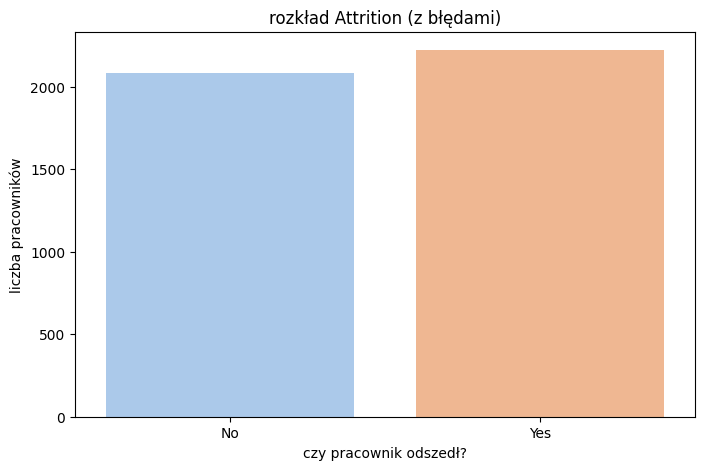

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_polaczone, x="Attrition", palette="pastel")
plt.title("rozkład Attrition (z błędami)")
plt.xlabel("czy pracownik odszedł?")
plt.ylabel("liczba pracowników")
plt.show()

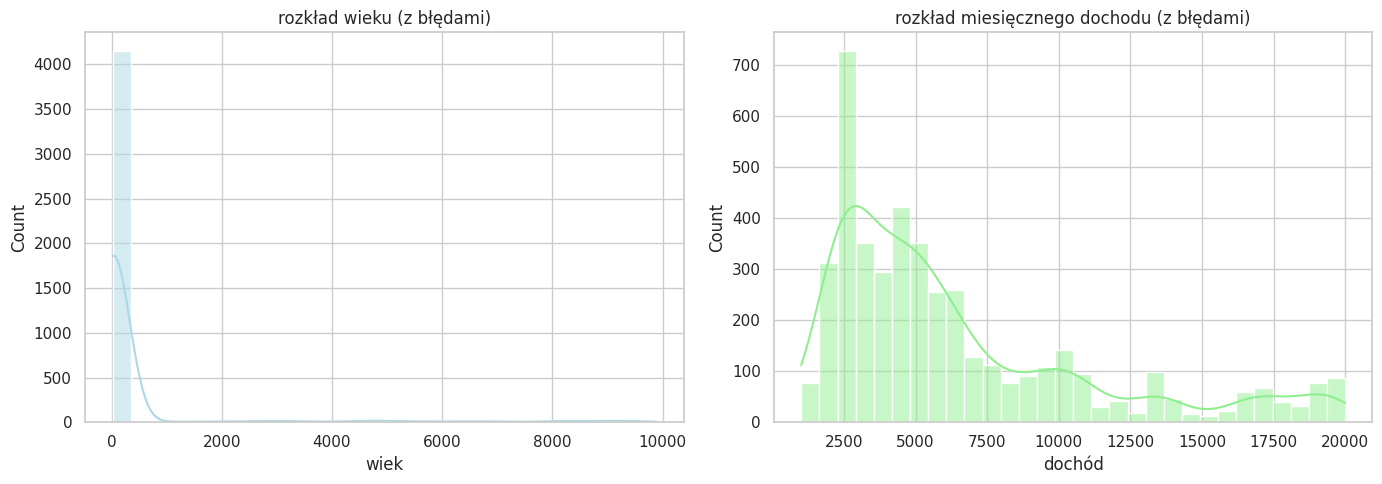

In [ ]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(df_polaczone["Age"], kde=True, bins=30, color="lightblue", ax=axes[0])
axes[0].set_title("rozkład wieku (z błędami)")
axes[0].set_xlabel("wiek")
sns.histplot(df_polaczone["MonthlyIncome"], kde=True, bins=30, color="lightgreen", ax=axes[1])
axes[1].set_title("rozkład miesięcznego dochodu (z błędami)")
axes[1].set_xlabel("dochód")
plt.tight_layout()
plt.show()

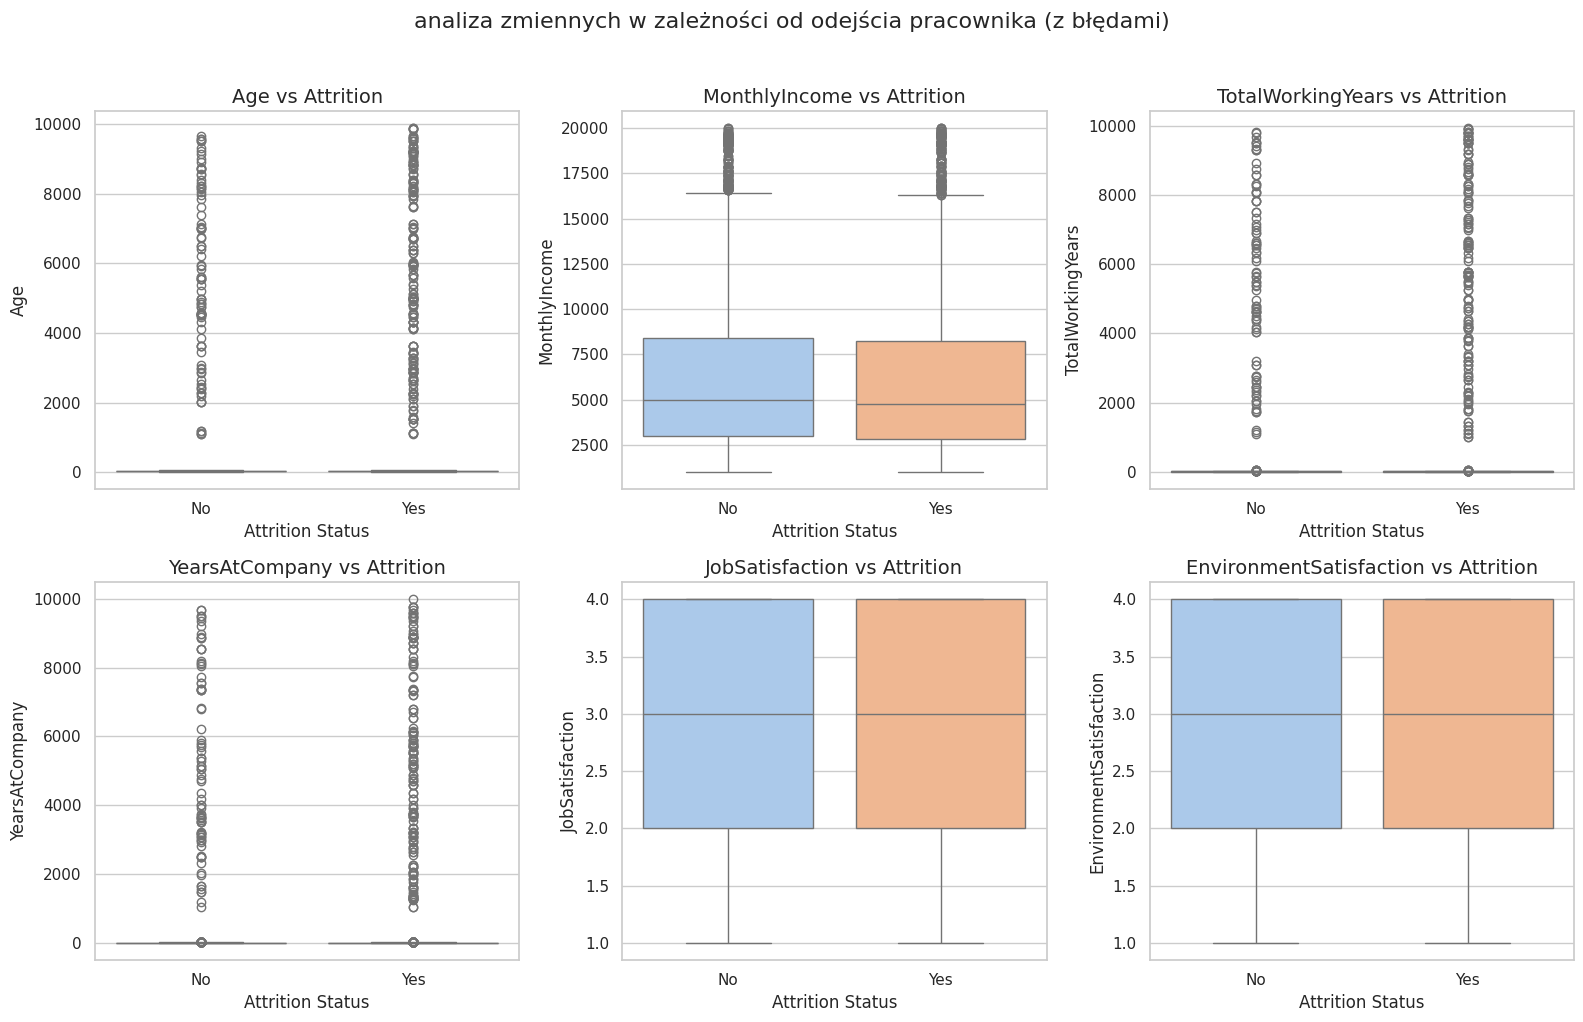

In [ ]:
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
zmienne_wykres = ["Age", "MonthlyIncome", "TotalWorkingYears", "YearsAtCompany", "JobSatisfaction", "EnvironmentSatisfaction"]
axes_flat = axes.flatten()
for i, zmienna in enumerate(zmienne_wykres):
  sns.boxplot(
    data=df_polaczone,
    x="Attrition",
    y=zmienna,
    hue="Attrition",
    ax=axes_flat[i],
    palette="pastel",
    dodge=False
  )
  axes_flat[i].set_title(f"{zmienna} vs Attrition", fontsize=14)
  axes_flat[i].set_ylabel(zmienna, fontsize=12)
  axes_flat[i].set_xlabel("Attrition Status", fontsize=12)
  if axes_flat[i].get_legend():
    axes_flat[i].get_legend().remove()
plt.suptitle("analiza zmiennych w zależności od odejścia pracownika (z błędami)", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

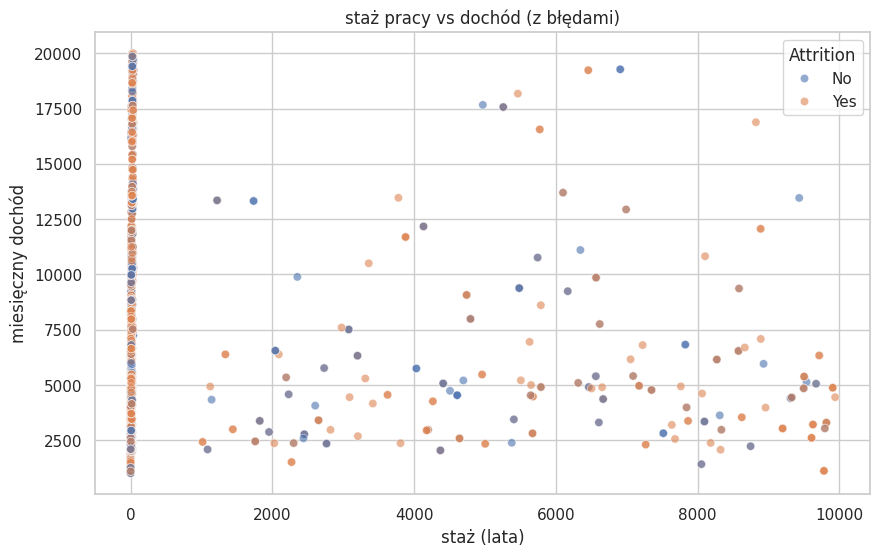

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_polaczone, x="TotalWorkingYears", y="MonthlyIncome", hue="Attrition", alpha=0.6)
plt.title("staż pracy vs dochód (z błędami)")
plt.xlabel("staż (lata)")
plt.ylabel("miesięczny dochód")
plt.show()

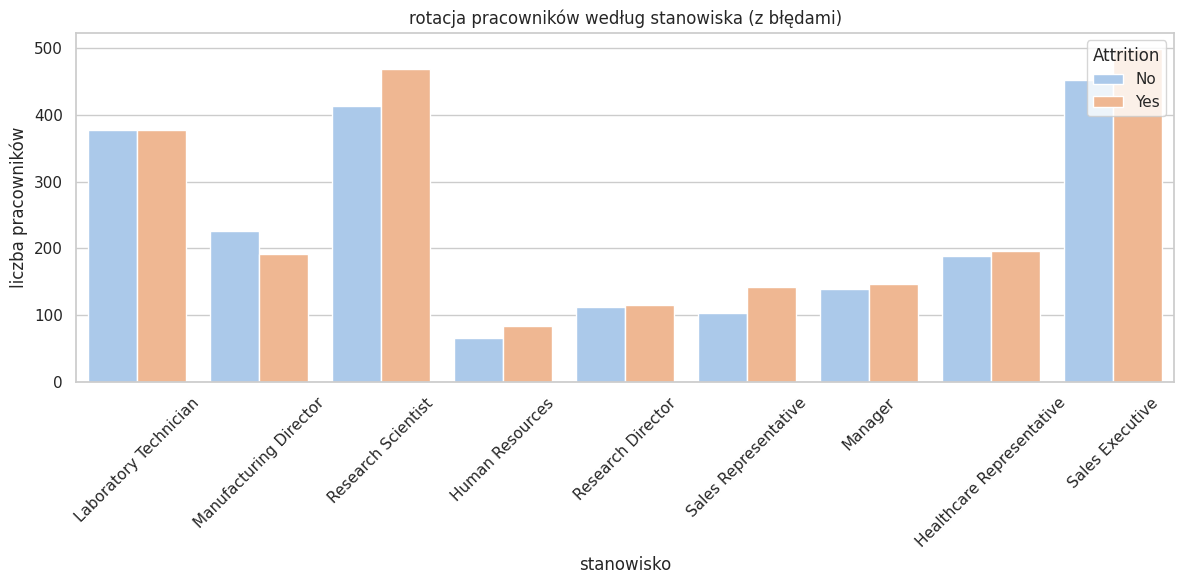

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_polaczone, x="JobRole", hue="Attrition", palette="pastel")
plt.title("rotacja pracowników według stanowiska (z błędami)")
plt.xlabel("stanowisko")
plt.ylabel("liczba pracowników")
plt.xticks(rotation=45)
plt.legend(title="Attrition", loc="upper right")
plt.tight_layout()
plt.show()

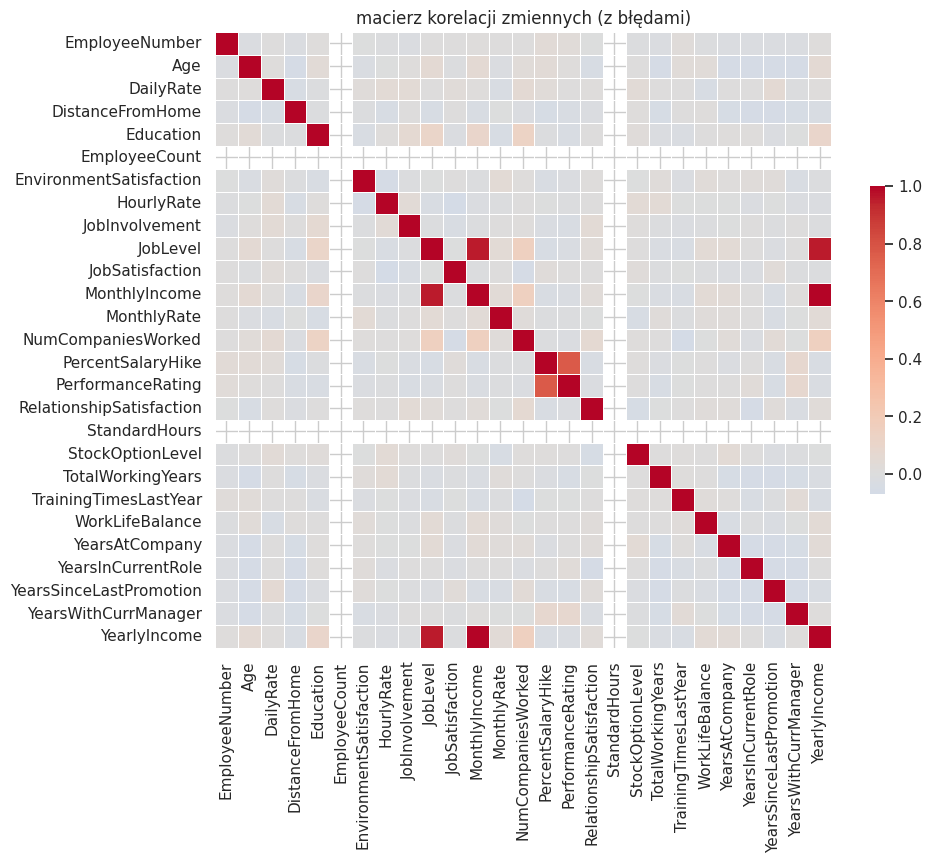

In [ ]:
plt.figure(figsize=(10, 8))
cols_num = df_polaczone.select_dtypes(include=[np.number]).columns
corr_matrix = df_polaczone[cols_num].corr()
sns.heatmap(corr_matrix, cmap="coolwarm", center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("macierz korelacji zmiennych (z błędami)")
plt.show()

In [ ]:
corr_matrix.min().min()

-0.06944027442624197

**Struktura danych**

Zbiór danych (połączony z trzech plików) składa się z **4449 wierszy** i **36 kolumn**.

**Statystyki opisowe**

Tabela statystyk ujawniła krytyczne błędy w danych, które fałszują obraz rzeczywistości:

 **Wiek (`Age`):**

* **Średnia:** 416 lat – wartość biologicznie niemożliwa.
* **Maksimum:** 9890 lat – ewidentny błąd wprowadzania danych (anomalia).
* **Mediana:** 36 lat – wartość poprawna, co sugeruje, że błędy dotyczą tylko części rekordów.


**Dystans od domu (`DistanceFromHome`):**
* **Maksimum:** 999 590 km – wartość absurdalna.


 **Staż pracy (`TotalWorkingYears`):**
* **Maksimum:** 9939 lat – kolejna anomalia skorelowana z błędnym wiekiem.


 **Dochód (`MonthlyIncome`):**
* Maksimum to 19 999, co wygląda na poprawną wartość (brak ekstremalnych anomalii w tej kolumnie).



**Braki danych**

Analiza wykazała braki w **tylko jednej, ale kluczowej kolumnie**:

* **Attrition (Rotacja):** Brak danych dla **147 pracowników**.


**Wnioski z Wizualizacji**

**a) Wykresy słupkowe**
*  Pierwszy wykres przedstawia liczebność pracowników w podziale na dwie klasy: osoby, które odeszły z firmy (Yes) oraz te, które w niej pozostały (No).
* Przed obsługą braków danych widzimy, że ponad 200 osób więcej postanowiło zrezygnować z pracy w stosunku do tych co zostali.
* Drugi wykres słupkowy przedstawia rotację pracowników w zależności od stanowiska.

**b) Histogramy**

* Pierwszy wykres jest "zepsuty" przez anomalie. Oś pozioma rozciąga się aż do 10 000 lat, przez co słupek z prawdziwymi danymi (20-60 lat) jest ściśnięty z lewej strony, a daleko po prawej widać małe słupki reprezentujące błędne rekordy.
* Na drugim wykresie, rozkład jest silnie prawostronnie skośny - większość pracowników zarabia poniżej 5000, a liczba osób z wysokimi zarobkami szybko spada.

**c) Wykresy pudełkowe**

* Wykresy ujawniają krytyczne błędy w zmiennych czasowych (Age, TotalWorkingYears, YearsAtCompany), gdzie występują nierealne wartości rzędu 10 000.
* Pozostałe wykresy wyglądają poprawnie

**d) Wykres punktowy**

*  Na wykresie wyraźnie widać grupę punktów "wyrzuconą" daleko w prawo (przy wartości 10 000 lat stażu).
*  W głównej grupie danychh widać pozytywną korelację - wraz ze wzrostem stażu pracy rośnie wynagrodzenie, co jest zjawiskiem naturalnym.

**e) Macierz Korelacji**

* Obecność ekstremalnych wartości odstających (anomalii) zaburza wyliczanie korelacji

In [ ]:
df_oczyszczone = df_polaczone.copy()
df_oczyszczone = df_oczyszczone.dropna(subset=["Attrition"])
df_oczyszczone = df_oczyszczone[
  (df_oczyszczone["Age"] < 100) &
  (df_oczyszczone["DistanceFromHome"] < 200) &
  (df_oczyszczone["TotalWorkingYears"] < 60) &
  (df_oczyszczone["YearsAtCompany"] < 60)
]

kolumny_opuszczone = ["EmployeeNumber", "EmployeeCount", "StandardHours", "Over18", "YearlyIncome"]
df_model = df_oczyszczone.drop(columns=[k for k in kolumny_opuszczone if k in df_oczyszczone.columns])

print(f"liczba wierszy po czyszczeniu: {len(df_model)}")

liczba wierszy po czyszczeniu: 3213


/tmp/ipython-input-2228502037.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_model, x="Attrition", palette="pastel")


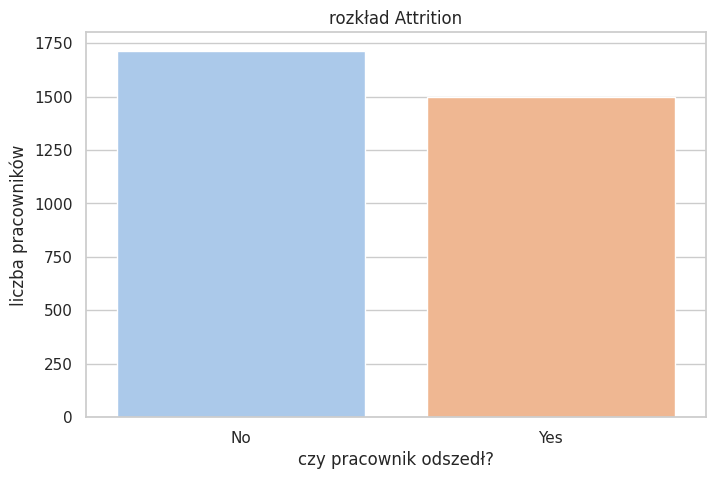

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_model, x="Attrition", palette="pastel")
plt.title("rozkład Attrition")
plt.xlabel("czy pracownik odszedł?")
plt.ylabel("liczba pracowników")
plt.show()

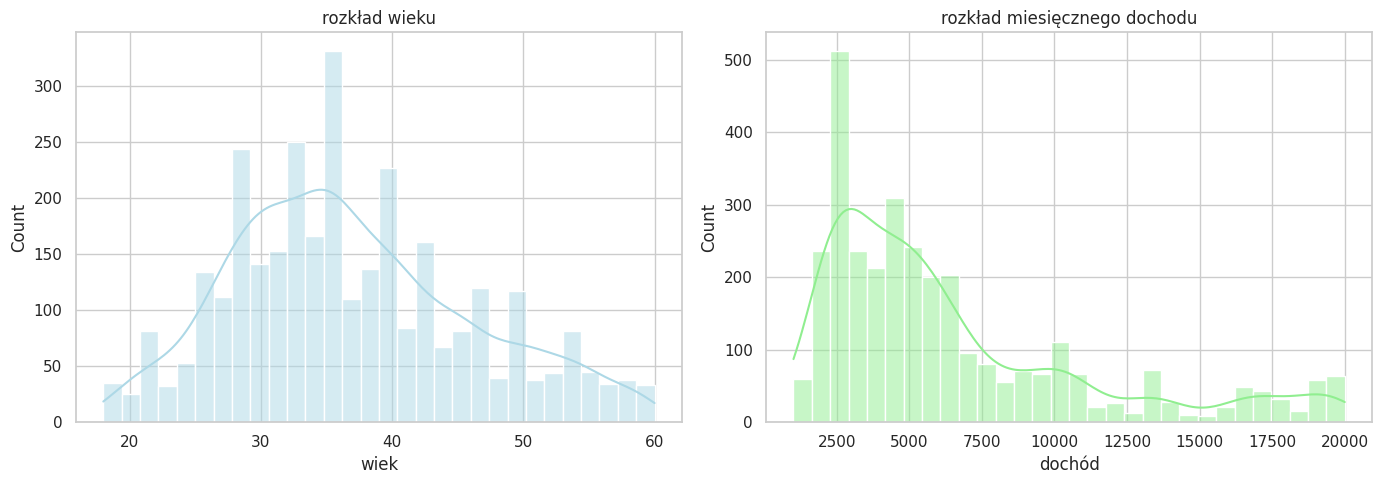

In [ ]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(df_model["Age"], kde=True, bins=30, color="lightblue", ax=axes[0])
axes[0].set_title("rozkład wieku")
axes[0].set_xlabel("wiek")
sns.histplot(df_model["MonthlyIncome"], kde=True, bins=30, color="lightgreen", ax=axes[1])
axes[1].set_title("rozkład miesięcznego dochodu")
axes[1].set_xlabel("dochód")
plt.tight_layout()
plt.show()

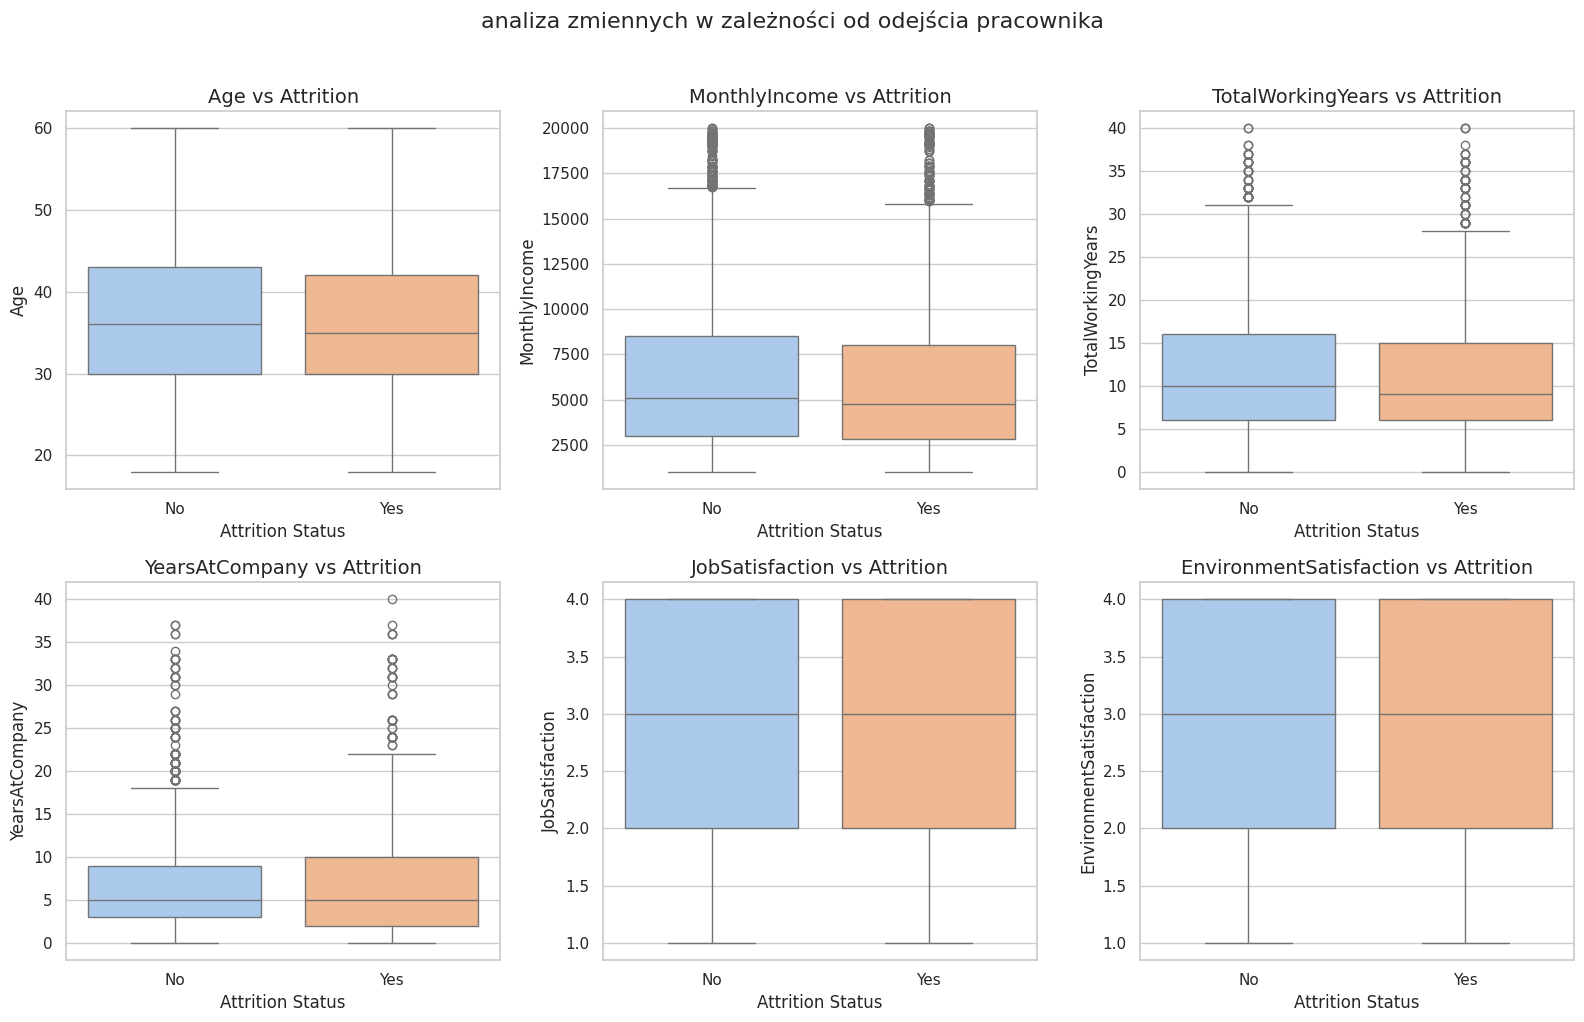

In [ ]:
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
zmienne_wykres = ["Age", "MonthlyIncome", "TotalWorkingYears", "YearsAtCompany", "JobSatisfaction", "EnvironmentSatisfaction"]
axes_flat = axes.flatten()
for i, zmienna in enumerate(zmienne_wykres):
  sns.boxplot(
    data=df_model,
    x="Attrition",
    y=zmienna,
    hue="Attrition",
    ax=axes_flat[i],
    palette="pastel",
    dodge=False
  )
  axes_flat[i].set_title(f"{zmienna} vs Attrition", fontsize=14)
  axes_flat[i].set_ylabel(zmienna, fontsize=12)
  axes_flat[i].set_xlabel("Attrition Status", fontsize=12)
  if axes_flat[i].get_legend():
    axes_flat[i].get_legend().remove()
plt.suptitle("analiza zmiennych w zależności od odejścia pracownika", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

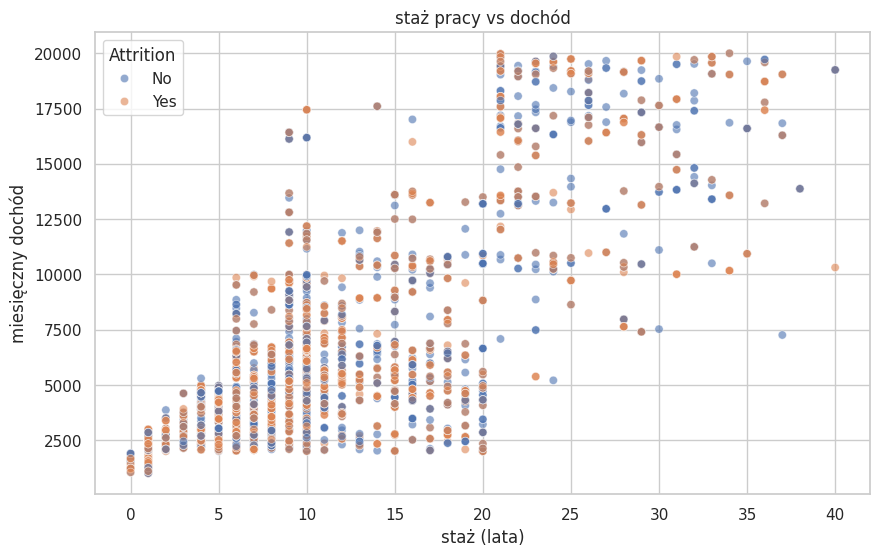

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_model, x="TotalWorkingYears", y="MonthlyIncome", hue="Attrition", alpha=0.6)
plt.title("staż pracy vs dochód")
plt.xlabel("staż (lata)")
plt.ylabel("miesięczny dochód")
plt.show()

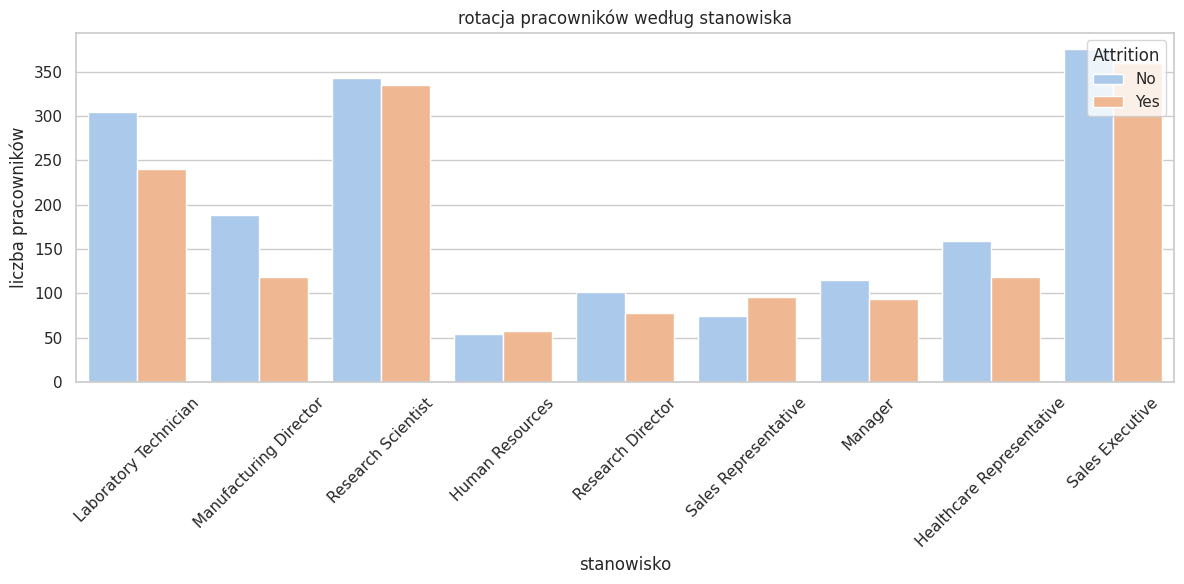

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_model, x="JobRole", hue="Attrition", palette="pastel")
plt.title("rotacja pracowników według stanowiska")
plt.xlabel("stanowisko")
plt.ylabel("liczba pracowników")
plt.xticks(rotation=45)
plt.legend(title="Attrition", loc="upper right")
plt.tight_layout()
plt.show()

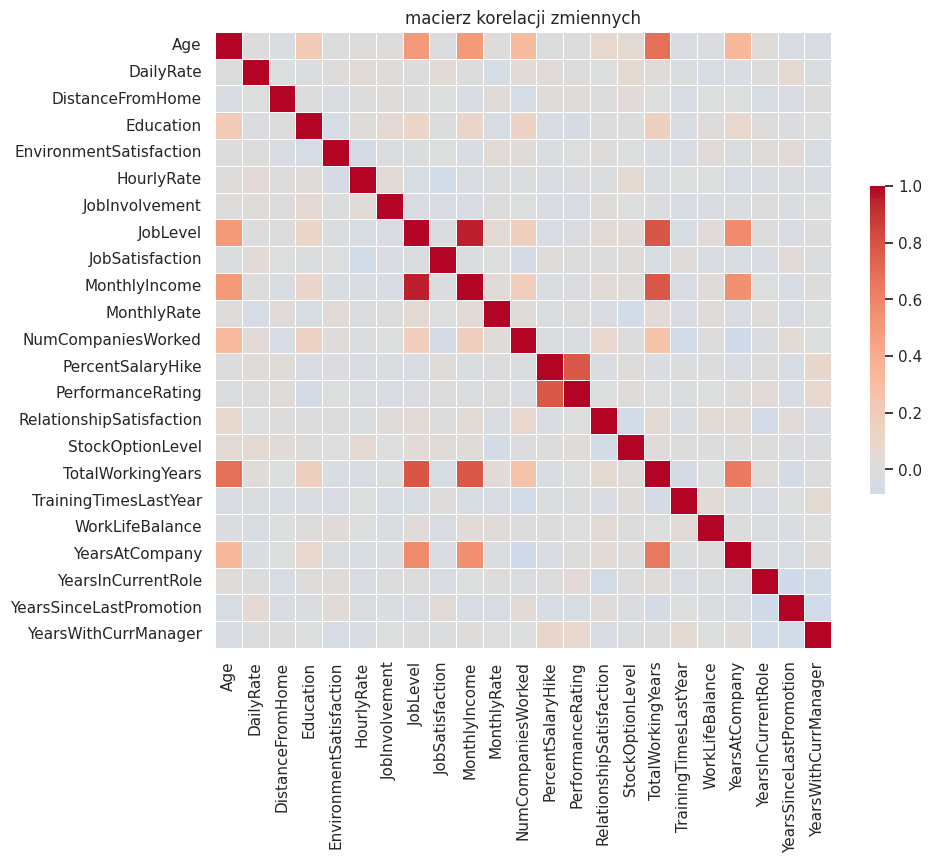

In [ ]:
plt.figure(figsize=(10, 8))
cols_num = df_model.select_dtypes(include=[np.number]).columns
corr_matrix = df_model[cols_num].corr()
sns.heatmap(corr_matrix, cmap="coolwarm", center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("macierz korelacji zmiennych")
plt.show()

In [ ]:
le = LabelEncoder()
df_model["Attrition"] = le.fit_transform(df_model["Attrition"])
print(f"kodowanie klasy Attrition: {dict(zip(le.classes_, le.transform(le.classes_)))}")
df_kodowanie = pd.get_dummies(df_model, drop_first=True)

kodowanie klasy Attrition: {'No': np.int64(0), 'Yes': np.int64(1)}


In [ ]:
df_kodowanie = pd.get_dummies(df_model, drop_first=True)
X = df_kodowanie.drop("Attrition", axis=1)
y = df_kodowanie["Attrition"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"zbiór treningowy: {X_train.shape}")
print(f"zbiór testowy: {X_test.shape}")

zbiór treningowy: (2570, 44)
zbiór testowy: (643, 44)


In [ ]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [ ]:
df_check = pd.DataFrame(X_train_s, columns=X.columns)

In [ ]:
X_train_s[0]

array([ 0.3654652 , -0.64137077, -1.02158891,  1.03981485, -1.57474816,
        0.8348452 ,  0.35374312, -0.97010804,  1.16553868, -0.87220151,
       -1.42620647,  2.12222761,  1.05174202, -0.41783809,  0.24431089,
        1.50763292, -0.40772201,  0.17030672, -1.05555235, -0.96637611,
       -0.28081682, -0.29382573,  3.29904856, -0.45699332,  0.62385029,
        0.73097767, -0.67229265,  1.16524597, -0.34967234, -0.66193997,
       -0.24452774, -0.31500811,  0.81715862, -0.18268427,  2.24025341,
       -0.26192951, -0.32826608, -0.23453829, -0.5218019 , -0.54707606,
       -0.24093273,  1.05934557, -0.68329714, -0.63710917])

Obsługa braków danych

* Zidentyfikowałam braki danych w zmiennej celu `Attrition`.
* Usunęłam wiersze, w których brakowało tej etykiety, ponieważ ich imputacja mogłaby wprowadzić błędne informacje do procesu uczenia.


Czyszczenie danych

* Na podstawie wniosków z poprzedniego etapu, usunęłam rekordy zawierające nierealistyczne wartości, które mogłyby zaburzyć działanie modelu.
* Zastosowane filtry: `Age < 100`, `DistanceFromHome < 200` oraz `TotalWorkingYears < 60`.
* Finalnie do dalszej analizy pozostało **3213** poprawnych rekordów (z początkowych 4449).

Selekcja cech

* Usunęłam kolumny, które nie wnoszą wartości predykcyjnej lub wprowadzają szum:
* `EmployeeNumber` (unikalny identyfikator pracownika),
* `YearlyIncome` (zmienna skorelowana w 100% z dochodem miesięcznym),
* `Over18`, `StandardHours`, `EmployeeCount` (zmienne stałe, posiadające tę samą wartość dla wszystkich rekordów).

Wykresy po eliminacji braków

* Wykres słupkowy po eliminacji braków i anomalii zmienił się diametralnie – z początkowej, błędnej przewagi osób odchodzących przeszliśmy do stanu, w którym większość stanowią pracownicy pozostający w firmie, co odzwierciedla teraz rzeczywistą strukturę zatrudnienia. Wykres rotacji pracowników w zależności od stanowiska zmienił się nieznacznie.
* W przypadku histogramów, usunięcie ekstremalnych anomalii w kolumnie wieku (sięgających 10 000 lat) pozwoliło na poprawne przeskalowanie osi X, dzięki czemu zamiast nieczytelnego, ściśniętego słupka widzimy teraz rzeczywisty i szczegółowy rozkład wieku pracowników w przedziale 18–60 lat. Wykres dochodów zmienił się w niewielkim stopniu, co potwierdza wcześniejszą diagnozę, że ta zmienna była wolna od anomalii.
* Wcześniej wykresy pudełkowe dla zmiennych czasowych były całkowicie nieczytelne, gdyż anomalie sięgające 10 000 spłaszczały właściwe dane do poziomu niewidocznych linii. Po usunięciu błędów osie wróciły do naturalnych skal, odsłaniając rzeczywistą strukturę pudełek, co pozwala teraz dostrzec realne różnice w medianach.
* Dla wykresów punktowych, usunięcie anomalii (staż rzędu 10 000 lat), które wcześniej kompresowały właściwe dane do nieczytelnej pionowej linii po lewej stronie, przywróciło naturalną skalę osi X (0–40 lat). Dzięki temu odzyskaliśmy widoczność głównej chmury punktów, która teraz wyraźnie potwierdza silną, pozytywną korelację, że wraz ze wzrostem stażu pracy systematycznie rośnie wynagrodzenie.
* Wcześniej heatmap korelacji był niemal pusty (blady), ponieważ pojedyncze gigantyczne błędy całkowicie zaburzały obliczenia współczynników korelacji. Teraz, na poprawionym wykresie, wyraźnie ujawniły się silne, logiczne zależności (czerwone pola), np. ścisły związek między wiekiem, a poziomem wynagrodzenia.

Kodowanie

* Zmienna celu `Attrition` została zakodowana binarnie (`No` = 0, `Yes` = 1).
* Zmienne kategoryczne (np. `JobRole`, `EducationField`, `Department`) przekształciłam na wartości liczbowe. Operacja ta zwiększyła liczbę kolumn do 44.

Podział danych

* Podzieliłam zbiór danych na część treningową (**80%**) i testową (**20%**).
* Zastosowałam stratyfikację (`stratify=y`), aby zachować identyczne proporcje osób odchodzących i zostających w obu podzbiorach.
* **Zbiór treningowy:** 2570 wierszy.
* **Zbiór testowy:** 643 wiersze.

Standaryzacja cech

* Zastosowałam standaryzację (`StandardScaler`) dla zmiennych numerycznych, aby sprowadzić je do wspólnej skali (średnia $\mu$ = 0, odchylenie standardowe $\sigma$= 1, czyli parametry dla standardowego rozkładu normalnego, którego gęstość wyraża się wzorem ${\displaystyle f_{0 ,1 }(x)={\frac {1}{{\sqrt {2\pi }}}}\,e^ {\frac {-x^{2}}{2}},{\displaystyle x\in \mathbb {R} }.}$
* Skaler został dopasowany wyłącznie na zbiorze treningowym, a następnie zastosowany do obu zbiorów, co zapobiega wyciekowi danych ze zbioru testowego.

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)

In [ ]:
rf_model.fit(X_train_s, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

**Typ zadania:** Klasyfikacja

Ze względu na charakter zmiennej celu (`Attrition`), która przyjmuje wartości binarne (tak/nie), zdefiniowałam problem jako zadanie klasyfikacji.

**Zaimplementowany model:** Random Forest Classifier (Las Losowy)

Uzasadnienie:

a) Algorytm doskonale radzi sobie z danymi tabelarycznymi zawierającymi mieszankę cech numerycznych (np. wiek, pensja) i kategorycznych (np. dział, rola zawodowa), co jest charakterystyczne dla analizowanego zbioru.

b) Dzięki zastosowaniu techniki *ensemble learning* (czyli uczenie zespołowe), polegającej na budowie wielu drzew decyzyjnych i uśrednianiu ich predykcji, model jest znacznie bardziej stabilny i mniej podatny na dopasowanie do szumu w danych treningowych niż pojedyncze drzewo decyzyjne.

c)  Decyzje o odejściu z pracy często wynikają ze złożonych, nieliniowych interakcji między czynnikami (np. wysokie ryzyko rotacji może występować tylko przy specyficznej kombinacji młodego wieku i niskich zarobków). Random Forest skutecznie wykrywa takie nieliniowe zależności.


In [ ]:
y_pred = rf_model.predict(X_test_s)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"accuracy: {accuracy:.4f}")
print(f"F1-score: {f1:.4f}")

accuracy: 0.5972
F1-score: 0.5010


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.74      0.66       343
           1       0.59      0.43      0.50       300

    accuracy                           0.60       643
   macro avg       0.60      0.59      0.58       643
weighted avg       0.60      0.60      0.59       643



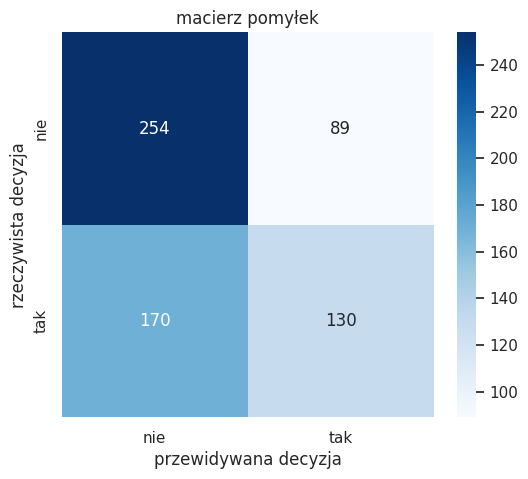

In [ ]:
macierz_pomylek = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(
  macierz_pomylek,
  annot=True,
  fmt="d",
  cmap="Blues",
  xticklabels=["nie", "tak"],
  yticklabels=["nie", "tak"]
)
plt.title("macierz pomyłek")
plt.ylabel("rzeczywista decyzja")
plt.xlabel("przewidywana decyzja")
plt.show()

Metryki jakości

* **Accuracy: 0.5972 (ok. 60%)**
Wynik ten oznacza, że model poprawnie przewiduje decyzję pracownika (odejście lub pozostanie) w około 60% przypadków.
* **F1-Score (dla klasy pozytywnej Yes): 0.5010**
F1-score, będący średnią harmoniczną precyzji i czułości, wynosi 0.50. Sugeruje to, że model ma trudności ze zbalansowaniem precyzji (ile z wytypowanych odejść to faktyczne odejścia) i czułości (ile faktycznych odejść udało się wykryć).

Wnioski z klasyfikacji

* **Klasa nie (pracownik zostaje):** Model lepiej radzi sobie z identyfikacją pracowników pozostających (F1-score = 0.66).
* **Klasa tak (pracownik odchodzi):** Wykrywanie rotacji jest znacznie trudniejsze (F1-score = 0.50). Niski wskaźnik **Recall** na poziomie 0.43 oznacza, że model "przegapia" ponad połowę pracowników, którzy faktycznie planują odejść (False Negatives).

Macierz pomyłek

* **True Negative (lewy górny):** Liczba poprawnie zidentyfikowanych pracowników, którzy zostają w firmie.
* **True Positive (prawy dolny):** Liczba poprawnie zidentyfikowanych odejść.
* **False Positive (prawy górny) & False Negative (lewy dolny):** Obszary błędów, w szczególności *False Negative* – sytuacje, w których model przewidział, że pracownik zostanie, a w rzeczywistości odszedł.

$$Accuracy = \frac{TP + TN}{Wszystkie \ przypadki}$$

$$Precision = \frac{TP}{TP + FP}$$

$$Recall = \frac{TP}{TP + FN}$$


Na podstawie przeprowadzonej analizy danych oraz oceny modelu predykcyjnego mamy następujące wnioski dotyczące jakości rozwiązania, jego potencjalnej przydatności w biznesie oraz napotkanych ograniczeń.

**Ocena jakości modelu**

Zbudowany model klasyfikacyjny (Random Forest) osiągnął ogólną dokładność (`Accuracy`) na poziomie ok. **60%**.

* Jest to wynik lepszy od losowego zgadywania, jednak w kontekście predykcji rotacji pracowników wskazuje na umiarkowaną skuteczność.
* Kluczowym problemem modelu jest niska czułość (`Recall`) dla klasy osób odchodzących (ok. 43%). Oznacza to, że model **nie wykrywa ponad połowy pracowników**, którzy faktycznie planują odejść. Jest to tzw. False Negative, które w tym kontekście biznesowym jest kosztowne (firma traci pracownika, nie podejmując próby jego zatrzymania).

**Przydatność**

W obecnym stanie model **nie jest gotowy do wdrożenia** jako samodzielne, automatyczne narzędzie decyzyjne. Nie można na jego podstawie podejmować krytycznych decyzji personalnych.
Może on jednak pełnić funkcję **narzędzia wspomagającego (doradczego)** dla działu HR, służąc do:

* Wstępnego typowania grup ryzyka w celu głębszej analizy manualnej.
* Identyfikacji kluczowych czynników wpływających na odejścia (analiza ważności cech wykazała, że wynagrodzenie i staż pracy są silnymi predyktorami).

**Ograniczenia zastosowanego podejścia**

Główną przyczyną umiarkowanych wyników nie jest dobór algorytmu, lecz jakość i charakter danych wejściowych:

* **Wysokie zaszumienie danych:** Etap eksploracji ujawnił liczne anomalie (np. wiek > 9000 lat, nierealistyczny staż pracy). Mimo procesu czyszczenia, dane mogą zawierać ukryte błędy systemowe, które utrudniają modelowi znalezienie precyzyjnych wzorców.
* **Brak danych "miękkich":** Model opierał się wyłącznie na danych demograficznych i finansowych. Decyzja o odejściu z pracy często zależy od czynników nieujętych w tym zbiorze, takich jak: relacje z przełożonym, atmosfera w zespole.
* **Niezbalansowanie klas:** Liczba osób odchodzących była mniejsza niż zostających, co naturalnie utrudnia modelowi naukę charakterystyki grupy "ryzykownej".
